**Random forest**:  model built with multiple trees

A random forest is an example of an ensemble because it uses multiple machine learning models to create a single model. 

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier(random_state=75)
rf.fit(X_train, y_train)
first_row = X_test[0]

print("random forest accuracy:", rf.score(X_test, y_test))

"""
Param:
  df = RandomForestClassifier(max_features=5)
  rf = RandomForestClassifier(n_estimators=15)
"""


random forest accuracy: 0.972027972027972


'\nParam:\n  df = RandomForestClassifier(max_features=5)\n  rf = RandomForestClassifier(n_estimators=15)\n'

 Grid Search class to help us find the optimal choice of parameters

In [2]:
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
    'max_features':  [5, 10, 20,],
}
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'max_features': 20, 'n_estimators': 75}


**Elbow Graph:** is a model that optimizes performance without adding unnecessary complexity

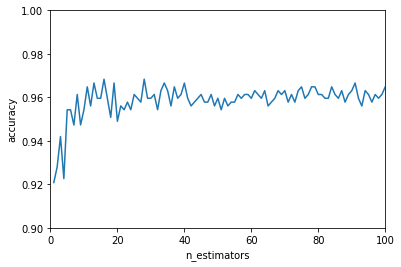

In [3]:
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()